<div align=center>
<font face="XB Niloofar">
<font size=4>
گزارش آزمایش سوم
<p></p>
<font size=4>
فرهاد فلاح 97102214 /امیررضا حاتمی پور97101507
<p></p>


In [53]:
import numpy as np
import os
from skimage import io,color
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import cv2
from sklearn.metrics import mean_squared_error


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
اثبات سوال امتیازی
<p></p>
<font size=4>


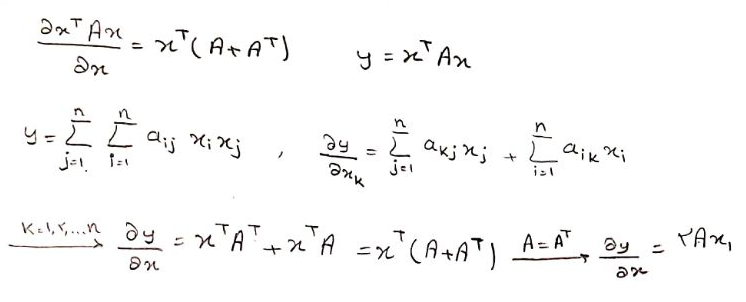


<div align=right>
<font face="XB Niloofar">
<font size=6 ,bold>
بخش اول:
<p></p>
<font size=4>
ابتدا داده ها را می خوانیم 
داده ها بصورت زیر می باشند

In [54]:
path = 'surprise'
surprise = []
for file in os.listdir(path):
    img = io.imread(path + "\\"+ file, as_gray=True)
    rows,cols = img.shape
    img_size = rows * cols
    img_1d = img.reshape(img_size)
    surprise.append(img_1d)

surprise = np.array(surprise)

path = 'happy'
happy = []
for file in os.listdir(path):
    img = io.imread(path + "\\"+ file, as_gray=True)
    rows,cols = img.shape
    img_size = rows * cols
    img_1d = img.reshape(img_size)
    happy.append(img_1d)

happy = np.array(happy)
print(surprise.shape)
print(happy.shape)

(88, 180000)
(85, 180000)


In [55]:
surprise_train, surprise_test = train_test_split(surprise, train_size =50, random_state=42)
happy_train, happy_test = train_test_split(happy, train_size =50, random_state=42)
print(surprise_train.shape, surprise_test.shape)
print(happy_train.shape, happy_test.shape)

(50, 180000) (38, 180000)
(50, 180000) (35, 180000)


In [56]:
X_train = np.append(surprise_train,happy_train, axis=0)
X_test = np.append(surprise_test,happy_test, axis=0)
y_train = np.append(np.ones((50,1)), np.zeros((50,1)), axis=0)
y_test = np.append(
    np.ones((surprise_test.shape[0], 1)),
    np.zeros((happy_test.shape[0], 1)), axis=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(100, 180000) (100, 1)
(73, 180000) (73, 1)



<div align=right>
<font face="XB Niloofar">
<font size=5 ,bold>
<p></p>
<font size=4>
در ادامه بعد داده هارا کاهش میدهیم و طبقه بند فیشر را تعریف میکنیم و ابتدا این کار را برای یک مقدار انجام داده و سپس برای مقادیر مختلف بررسی میکنیم. 

In [57]:
pca = PCA(n_components=20)
pca.fit(X_train)
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)
print(X_train_reduced.shape)
print(X_test_reduced.shape)

(100, 20)
(73, 20)


num_of_vecs: 1


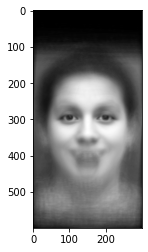

In [58]:
lda = LDA()
lda.fit(X_train_reduced, y_train.ravel())
print('num_of_vecs:',lda.coef_.shape[0])
vec = lda.coef_
vec_reconstruct = pca.inverse_transform(vec)
vec_img = vec_reconstruct.reshape(rows, cols)
imshow(vec_img, cmap='gray')


<div align=right>
<font face="XB Niloofar">
<font size=5 ,bold>
<p></p>
<font size=4>
میبینم طبقه بند ما تلفیقی از کلاس متعجب و خندان است و عملا ضرب داخلی هر کدام از داده های ما در این طبقه بند انرا به کلاس مورد نظر نزدیک تر میکند.

In [59]:
y_test_pred = lda.predict(X_test_reduced)
y_train_pred = lda.predict(X_train_reduced)

test_error = mean_squared_error(y_test_pred,y_test)
train_error = mean_squared_error(y_train_pred,y_train)

print(f"test error: {test_error}")
print(f"train error: {train_error}")

test error: 0.0136986301369863
train error: 0.0


In [60]:
from sklearn.neighbors import KNeighborsClassifier
test_error = []
train_error = []
for k in ([1, 3, 5]):
    knn_clf = KNeighborsClassifier(n_neighbors=k)
    knn_clf.fit(X_train_reduced, y_train.ravel())
    
    y_test_pred = knn_clf.predict(X_test_reduced)
    y_train_pred = knn_clf.predict(X_train_reduced)
    
    test_error.append(mean_squared_error(y_test_pred,y_test))
    train_error.append(mean_squared_error(y_train_pred,y_train))

    print("k =", k)
    print(f"test error: {test_error[k//2]}")
    print(f"train error: {train_error[k//2]}")

k = 1
test error: 0.4657534246575342
train error: 0.0
k = 3
test error: 0.3150684931506849
train error: 0.15
k = 5
test error: 0.2465753424657534
train error: 0.18


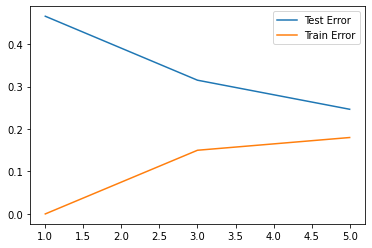

In [61]:
plt.plot(np.array([1,3,5]) , test_error , label="Test Error")
plt.plot(np.array([1,3,5]) , train_error ,label="Train Error")
plt.legend()


<div align=right>
<font face="XB Niloofar">
<font size=5 ,bold>
<p></p>
<font size=4>
حال برای مقادیر متفاوت کاهش بعد را انجام داده و مراحل بالا را تکرار میکنیم و در نهایت خطا را برای مقادیر مختلف نمایش میدهیم

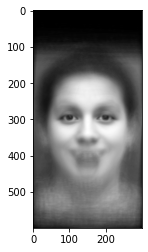

In [62]:
test_error_lda = []
train_error_lda = []
test_error_knn_1 = []
test_error_knn_3 = []
test_error_knn_5 = []
train_error_knn_1 = []
train_error_knn_3 = []
train_error_knn_5 = []
train_error_knn =[[]]
for n in range(5,50,5):
    pca = PCA(n_components=n)
    pca.fit(X_train)
    X_train_reduced = pca.transform(X_train)
    X_test_reduced = pca.transform(X_test)
    lda = LDA()
    lda.fit(X_train_reduced, y_train.ravel())
    plt.plot
    plt.imshow(vec_img, cmap='gray')
    y_test_pred_lda = lda.predict(X_test_reduced)
    y_train_pred_lda = lda.predict(X_train_reduced)

    test_error_lda.append(mean_squared_error(y_test_pred_lda,y_test))
    train_error_lda.append(mean_squared_error(y_train_pred_lda,y_train))
    
    for k in ([1, 3, 5]):
        knn_clf = KNeighborsClassifier(n_neighbors=k)
        knn_clf.fit(X_train_reduced, y_train.ravel())

        y_test_pred = knn_clf.predict(X_test_reduced)
        y_train_pred = knn_clf.predict(X_train_reduced)
        if k==1:
            test_error_knn_1.append(mean_squared_error(y_test_pred,y_test))
            train_error_knn_1.append(mean_squared_error(y_train_pred,y_train))
        elif k==3:
            test_error_knn_3.append(mean_squared_error(y_test_pred,y_test))
            train_error_knn_3.append(mean_squared_error(y_train_pred,y_train))
        else:
            test_error_knn_5.append(mean_squared_error(y_test_pred,y_test))
            train_error_knn_5.append(mean_squared_error(y_train_pred,y_train))

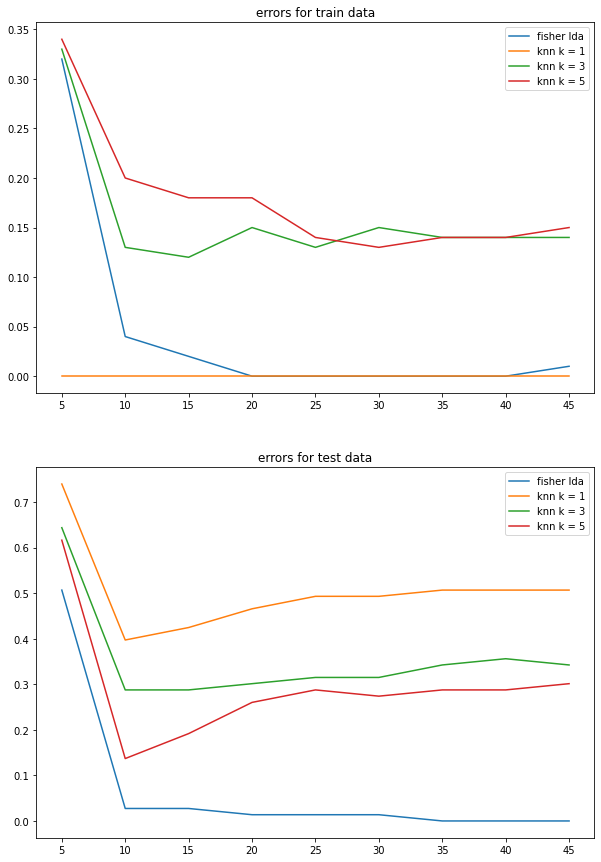

In [63]:
n = np.arange(5,50,5)
fig,ax = plt.subplots(2,1 , figsize=(10, 15))
plt.subplot(2,1,1)
plt.plot(n, train_error_lda, label = 'fisher lda')
plt.plot(n, train_error_knn_1, label = 'knn k = 1')
plt.plot(n, train_error_knn_3, label = 'knn k = 3')
plt.plot(n, train_error_knn_5, label = 'knn k = 5')
plt.legend()
plt.title('errors for train data')
plt.subplot(2,1,2)
plt.plot(n, test_error_lda, label = 'fisher lda')
plt.plot(n, test_error_knn_1, label = 'knn k = 1')
plt.plot(n, test_error_knn_3, label = 'knn k = 3')
plt.plot(n, test_error_knn_5, label = 'knn k = 5')
plt.title('errors for test data')
plt.legend()